# Анализ оттока клиентов из банка

## Материалы:
* [Презентация] (https://drive.google.com/file/d/1zL6KcqB-1a1_qCcle7KQd6d8XEjwe6oa/view?usp=sharing)

«Метанпром» — региональный банк, который располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Необходимо проанализировать данные и выделите сегменты клиентов, которые склонны уходить из банка. Отобрать из них лучшие и дать по ним рекомендации. Представить результат в виде презентации.

__Цель исследования:__
1. Изучить данные о клиентах банка.
2. Определить характеристики отточности клиентов.
3. Посмотреть портреты типичных клиентов, которые уходят и остаются.
4. Сформулировать и проверить статистические гипотезы.
5. Сформулировать сегменты и отбрать лучшие
6. Дать по сегментам рекомендации.
7. Представить результат в виде презентации.

__Ход исследования:__

В файле `bank_scrooge.csv` представлена информация о клиентах банка. Данные представлены для клиентов городов Ярославля, Ростова Великого и Рыбинска.
Перед анализом необходимо, изучим состав и тип данных, сделать предобработку, составить характеристики клиентов, выделить сегменты, дать рекомендации по ним и представить результат исследования в ввиде презентации.

Таким образом в моем исследовании будут следующие этапы:
1. Обзор данных.
3. Предобработка данных.
4. Исследовательский анализ клиентов.
5. Определение характеристик отточности клиентов.
6. Проверка статистических гипотез.
7. Сегментация клиентов по основным показателям.
8. Рекомендации по сегментам.
9. Создание презентации по результатам.

<a id="some_id"></a> **Оглавление**
1. [Загрузка данных и изучение общей информации](#loading)
    * 1.1. [Импорт библиотек, считывание данных](#import)
    * 1.2. [Вывод основной информации](#conclusion)
    * 1.3. [Исследование содержания столбцов](#research)
2. [Предобработка данных](#preprocessing)
    * 2.1. [Переименование столбцов](#rename)
    * 2.2. [Обработка дубликатов](#duplicates)
    * 2.3. [Исследование аномальных значений (обработка)](#anomalies)
    * 2.4. [Обработка пропусков](#null)
    * 2.5. [Преобразование данных в нужные типы, в соответствии со значениями в столбцах](#transformation)
    * 2.6. [Кодирование данных](#coding)
3. [Исследовательский анализ](#analis)
    * 3.1. [Процент отточный клиентов](#outflow)
    * 3.2. [Корреляционный анализ](#correlation)
    * 3.3. [Построение распределений в разрезе оттока](#cut)  
    * [Вывод](#finding)
4. [Проверка статистических гипотез](#hypothesis)
5. [Сегментация по основным показателям](#segmentation)
    * 5.1. [Формирование сегментов](#segment)
    * 5.2. [Отбор лучших сегментов](#selection)  
6. [Выводы и рекомендации по сегментам](#recommendations)

<a id="loading"></a>
## 1. Загрузка данных и изучение общей информации

<a id="import"></a>
**1.1. Импорт библиотек, считывание данных.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

<a id="conclusion"></a>
**1.2. Вывод основной информации.**

In [3]:
# напишем функцию для вывода общей информации, дубликатов, первых 5 строк и пропусков
def check_df (data):
    display(data.info())
    display(data.head())
    df_duplicates = data.duplicated().sum()
    display(f"Количество дубликатов: {df_duplicates}")
    display(f"Количество пропусков:")  
    display(data.isna().sum())

In [4]:
check_df (df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


'Количество дубликатов: 0'

'Количество пропусков:'

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

<span style="color:purple">**Вывод:**</span> в файле `bank_scrooge.csv` 10000 клиентов и 12 параметров. Явных дубликатов нет. Есть пропуски в столбцах `age` (26) и `balance` (2295). Необходимо переименовать колонки `USERID` и `EST_SALARY`. В столбцах `score` и `age` необходимо изменить тип данных на int.

<a id="preprocessing"></a>
## 2. Предобработка данных

<a id="rename"></a>
**2.1. Переименование столбцов.**

In [5]:
df.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'}, inplace=True)
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<a id="duplicates"></a>
**2.2. Обработка дубликатов.**

In [6]:
#посмотрим есть ли дубликаты в столбце `user_id`
df['user_id'].nunique()

9927

In [7]:
df_duplicat = df[df['user_id'].duplicated(keep=False)]
df_duplicat

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


In [8]:
#сгруппируем по user_id в разрезе city
df_group = df_duplicat.groupby(['user_id', 'city']).size().reset_index(name='count')
display(df_group)

,user_id,city,count
0,116540,Рыбинск,1
1,116540,Ярославль,1
2,117943,Рыбинск,1
3,117943,Ярославль,1
4,120258,Рыбинск,1
...,...,...,...
141,226719,Ярославль,1
142,227795,Рыбинск,1
143,227795,Ярославль,1
144,228075,Рыбинск,1


<span style="color:purple">**Комментарий**</span> видно, что есть дубликаты user_id, отличие в городах. Скорей всего это связано с технической ошибкой. Оставим их.

<a id="anomalies"></a>
**2.3. Исследование аномальных значений (обработка).**

In [9]:
df.describe().round(1)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.0,10000.0,9974.0,10000.0,7705.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,171814.7,848.7,42.7,2.6,827794.3,1.9,0.7,0.5,147866.9,0.2
std,33708.2,65.4,12.2,2.0,1980614.1,0.8,0.5,0.5,139388.5,0.4
min,94561.0,642.0,18.0,0.0,0.0,0.0,0.0,0.0,2546.3,0.0
25%,142810.2,802.0,33.0,0.0,295554.2,1.0,0.0,0.0,75251.9,0.0
50%,172728.0,853.0,40.0,3.0,524272.2,2.0,1.0,1.0,119658.1,0.0
75%,201261.8,900.0,51.0,4.0,980705.8,2.0,1.0,1.0,174500.5,0.0
max,229145.0,1000.0,86.0,9.0,119113552.0,5.0,1.0,1.0,1395064.4,1.0


<span style="color:purple">**Комментарий:**</span> количество продуктов `products`, которыми пользуется клиент не может быть равен 0, т.к. клиент, если пользуется банком он автоматически меет как минимум один продукт. В `est_salary` (оценочный доход клиента) минимальное значение равно 2546.3. Минимальный размер оплаты труда (МРОТ) в Ярославле, Ростове Великом и Рыбинске составляет 19 242 рублей. МРОТ не распространяется на студентов, обучающихся на очной форме обучения в образовательных учреждениях, таких как колледжи и вузы (возьмем возраст обучающихся до 25 лет). Остальные данные выглядят нормально (если смотреть медианное и среднее значение)

In [10]:
df[df['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


In [11]:
#убирем эту строку
df = df[df['products'] != 0]

In [12]:
#посмотрим количество людей после 25 лет
len(df[(df['est_salary'] < 19242) & (df['age'] > 25)])

101

<span style="color:purple">**Комментарий:**</span> количество небольшое, поэтому удалим эти строки

In [13]:
df = df[~((df['est_salary'] < 19242) & (df['age'] > 25))]

<a id="null"></a>
**2.4. Обработка пропусков.**

In [14]:
#посмотрим какой процент пропусков от общего числа
(df['age'].isnull().sum() / len(df['age'])*100).round(2)

0.26

<span style="color:purple">**Комментарий:**</span> 0.03% это мало, поэтому удалим эти строки.

In [15]:
df = df.dropna(subset=['age'])

In [16]:
#проверим
df['age'].isna().sum()

0

In [17]:
#посмотрим какой процент пропусков от общего числа
(df['balance'].isnull().sum() / len(df['balance'])*100).round(2)

23.08

<span style="color:purple">**Комментарий:**</span> 23.0 % это много. Посмотрим в разрезе других признаков.

In [18]:
def missing_values(column):
    missing_city = df[df['balance'].isna()][column].value_counts()
    print(missing_city)

In [19]:
#по городу
missing_values('city')

Ярославль    1458
Рыбинск       585
Ростов        235
Name: city, dtype: int64


In [20]:
#по полу
missing_values('gender')

М    1272
Ж    1006
Name: gender, dtype: int64


In [21]:
#по оттоку
missing_values('churn')

0    2266
1      12
Name: churn, dtype: int64


In [22]:
#разделим данные на две группы с и без пропусков
df_with_na = df[df['balance'].isna()]
df_not_na = df[df['balance'].notna()]

In [23]:
name = ['equity', 'products', 'credit_card', 'last_activity', 'city', 'gender']

In [24]:
column_name = {
    'equity': 'Количество баллов собственности',
    'products': 'Количество продуктов',
    'credit_card': 'Кредитная карта',
    'last_activity': 'Активность клиента',
    'city': 'Город',
    'gender': 'Пол'
}

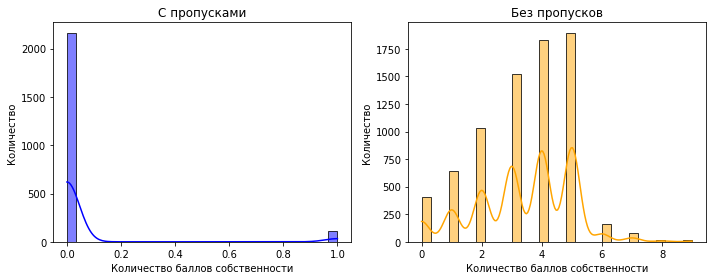

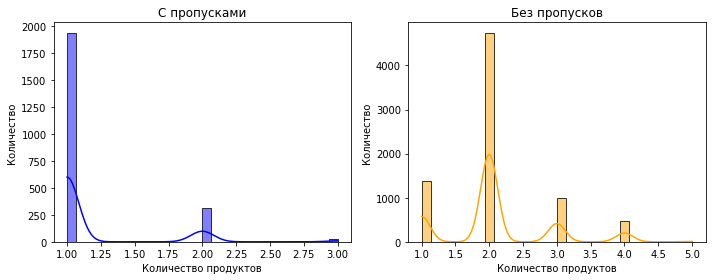

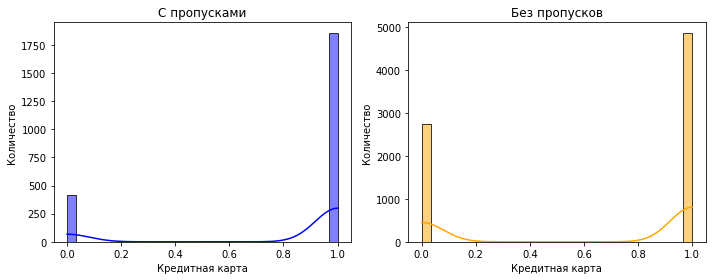

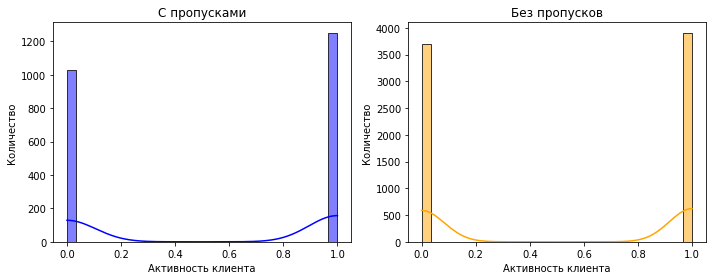

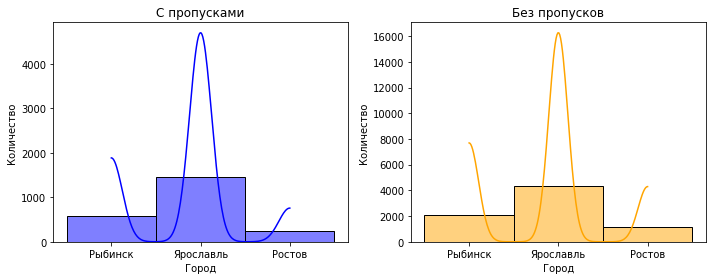

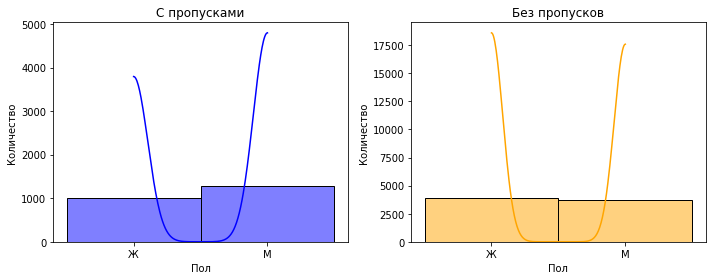

In [25]:
def plot_distributions(data_with_na, data_without_na, column):
    plt.figure(figsize=(10, 4))

    #график для данных с пропусками
    plt.subplot(1, 2, 1)
    sns.histplot(df_with_na[column], bins=30, color='blue', kde=True)
    plt.title('С пропусками')
    plt.xlabel(column_name.get(column, column))  # Название оси X
    plt.ylabel('Количество')  # Название оси Y

    #график для данных без пропусков
    plt.subplot(1, 2, 2)
    sns.histplot(df_not_na[column], bins=30, color='orange', kde=True)
    plt.title('Без пропусков')
    plt.xlabel(column_name.get(column, column))  # Название оси X
    plt.ylabel('Количество')  # Название оси Y

    plt.tight_layout()
    plt.show()

# Визуализация распределения переменных
for col in name:
    plot_distributions(df_with_na, df_not_na, col)

<span style="color:purple">**Комментарий:**</span>
пропуски по балансу на счете есть во всех городах. Взаимосвязи по признаку пола нет. На диаграммах видно различия распределения по столбцам equity и products. У людей с пропусками в балансе чаще всего наблюдается, что количество баллов в собственности составляет 0 или, реже, 1. В то время как у клиентов без пропусков преобладают значения 4 и 5. Кроме того, клиенты с пропусками в балансе, как правило, пользуются только одним продуктом банка, тогда как те, у кого нет пропусков, используют два продукта. Т.к. процент пропусков большой, а зависимости от других признаков не нашлось, то оставляем. Возможно была техническая ошибка.

In [26]:
# посмотрим сколько мы удалили всего данных от изначального датафрейма
round((1 - len(df) / 10000) * 100, 2)

1.28

<span style="color:purple">**Комментарий:**</span> удалено всего данных 1.28 %

<a id="transformation"></a>
**2.5. Преобразование данных в нужные типы, в соответствии со значениями в столбцах.**

In [27]:
df['score'] = (df['score']).astype('int')
df['age'] = (df['age']).astype('int')

<a id="coding"></a>
**2.6. Кодирование данных столбца `gender` и `city`.**

In [28]:
#заменим М и Ж
df['gender'] = df['gender'].replace({'М': 1, 'Ж': 0})

In [29]:
df['city_copy'] = df['city']

In [30]:
df = pd.get_dummies(df, columns=['city'], dtype=int)
df.head()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_copy,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850,0,25,1,59214.82,2,0,1,75719.14,1,Рыбинск,0,1,0
1,146556,861,0,37,5,850594.33,3,1,0,86621.77,0,Рыбинск,0,1,0
2,120722,892,0,30,0,NaN,1,1,1,107683.34,0,Рыбинск,0,1,0
3,225363,866,0,51,5,1524746.26,2,0,1,174423.53,1,Ярославль,0,0,1
4,157978,730,1,34,5,174.00,1,1,0,67353.16,1,Ярославль,0,0,1


In [31]:
#переименуем столбцы
df.rename(columns={'city_copy': 'city', 'city_Ростов': 'Ростов', 'city_Рыбинск': 'Рыбинск', 'city_Ярославль': 'Ярославль'}, inplace=True)
df.head()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city,Ростов,Рыбинск,Ярославль
0,183012,850,0,25,1,59214.82,2,0,1,75719.14,1,Рыбинск,0,1,0
1,146556,861,0,37,5,850594.33,3,1,0,86621.77,0,Рыбинск,0,1,0
2,120722,892,0,30,0,NaN,1,1,1,107683.34,0,Рыбинск,0,1,0
3,225363,866,0,51,5,1524746.26,2,0,1,174423.53,1,Ярославль,0,0,1
4,157978,730,1,34,5,174.00,1,1,0,67353.16,1,Ярославль,0,0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9872 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9872 non-null   int64  
 1   score          9872 non-null   int64  
 2   gender         9872 non-null   int64  
 3   age            9872 non-null   int64  
 4   equity         9872 non-null   int64  
 5   balance        7594 non-null   float64
 6   products       9872 non-null   int64  
 7   credit_card    9872 non-null   int64  
 8   last_activity  9872 non-null   int64  
 9   est_salary     9872 non-null   float64
 10  churn          9872 non-null   int64  
 11  city           9872 non-null   object 
 12  Ростов         9872 non-null   int64  
 13  Рыбинск        9872 non-null   int64  
 14  Ярославль      9872 non-null   int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.2+ MB


<span style="color:purple">**Вывод:**</span> 
переименовали столбцы 'user_id' и 'est_salary'. В столбце `products` (продукты которыми пользуется клиент) удалили страку со значением 0. В `est_salary` (оценочный доход клиента) удалили строки клиентов с возрастом более 25 лет и с доходом менее МРОТ равного 19242 рублей (количество строк 101). У далили пропуски в столбце `age`. Данные приведены к нужному типу. Выполнили кодирование данных столбца `gender` и `city`.

В результате предобработки было удалено 1.28 % от всех данных. Количество строк стало 9872, а столбцов 15.

<a id="analysis"></a>
## 3. Исследовательский анализ

<a id="outflow"></a>
**3.1. Процент отточный клиентов.**

In [33]:
churn_count = df['churn'].value_counts().reset_index()
churn_count['churn'] = churn_count['churn'].replace({0: 'Остались', 1: 'Ушли'})
churn_count.columns = ['churn', 'count']
churn_count

,churn,count
0,0,8065
1,1,1807


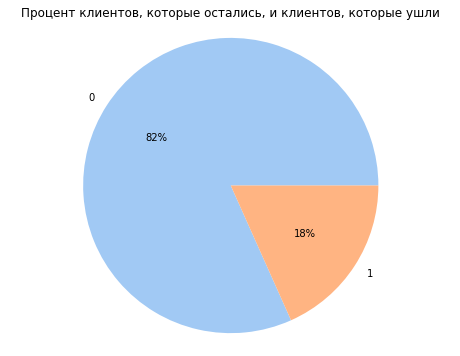

In [34]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(8, 6))
plt.pie(churn_count['count'], labels=churn_count['churn'], colors=colors, autopct='%.0f%%')
plt.title('Процент клиентов, которые остались, и клиентов, которые ушли')
plt.axis('equal')  # Чтобы круговая диаграмма была кругом
plt.show()

In [35]:
#разделим данные на две группы
df_churn = df[df['churn'] == 1]
df_not_churn = df[df['churn'] == 0]

<span style="color:purple">**Комментарий:**</span> всего ушло из банка 18 % клиентов (1807).

<a id="correlation"></a>
**3.2. Корреляционный анализ.**

In [36]:
#вычисляем корреляционную матрицу, исключая столбец 'city'
df_corr = df.drop(columns=['city']).corr()

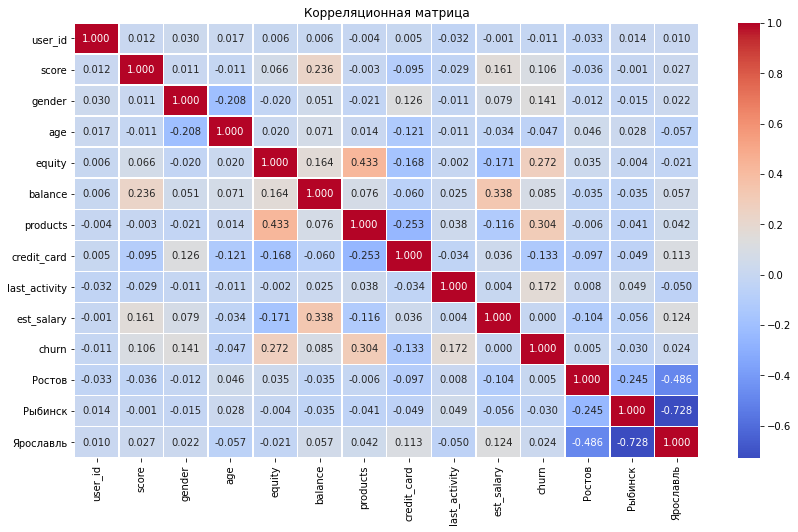

In [37]:
#строим матрицу
plt.figure(figsize=(14, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt = '0.3f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

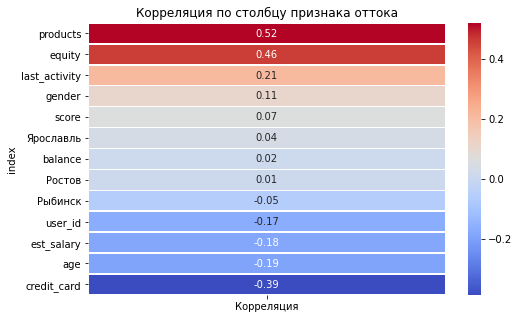

In [38]:
churn_corr = df_corr.corr()['churn'].drop('churn')
sorted_churn_corr = churn_corr.sort_values(ascending=False)
churn_corr_df = sorted_churn_corr.to_frame(name='Корреляция').reset_index()
plt.figure(figsize=(8, 5))
sns.heatmap(churn_corr_df.set_index('index'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляция по столбцу признака оттока')
plt.show()

<span style="color:purple">**Комментарий:**</span> по таблице видно, что небольшая корреляция оттока клиентов есть с такими параметрами, как:
- баллы кредитного скоринга (`score`),
- пол (`gender`),
- количество баллов собственности (`equity`),
- количество продуктов, которыми пользуется клиент (`products`),
- активность клиента (`last_activity`)

<a id="cut"></a>
**3.3. Построение распределений в разрезе оттока.**

In [39]:
def df_histograms(data, column, discret):
    plt.figure(figsize=(12, 8))
    sns.histplot(data = data, hue = "churn", x = column, stat='density', common_norm = False, legend = True, discrete = discret)
    plt.title(f'Нормированное распределение значений в столбце {column}')
    plt.xlabel(column_name.get(column, column))
    plt.ylabel('Плотность распределения')
    plt.legend(title='Отток', labels=['Ушел','Не ушел'])
    plt.grid(linewidth=0.3)
    plt.show()

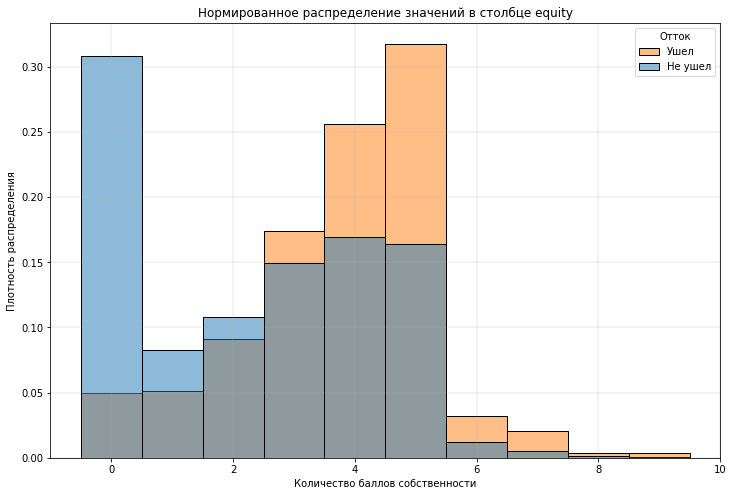

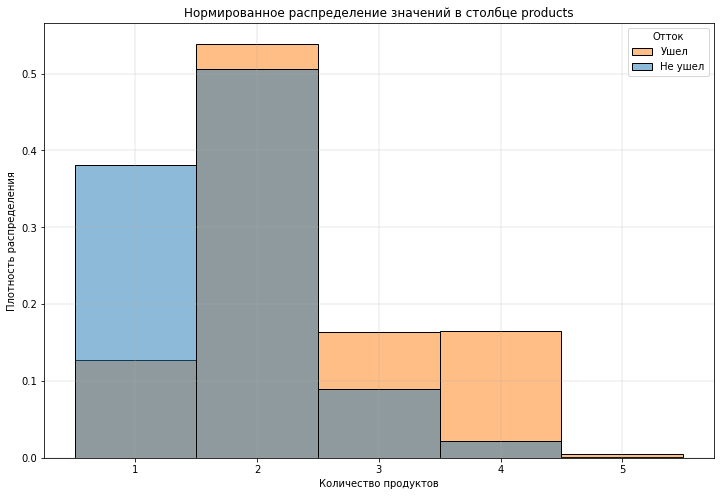

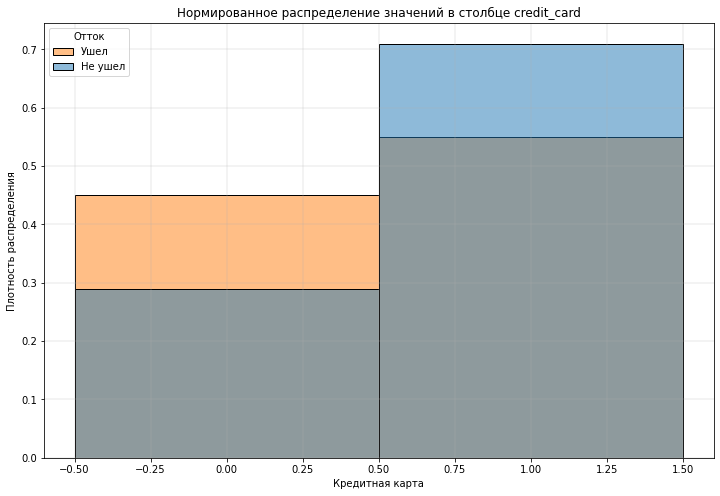

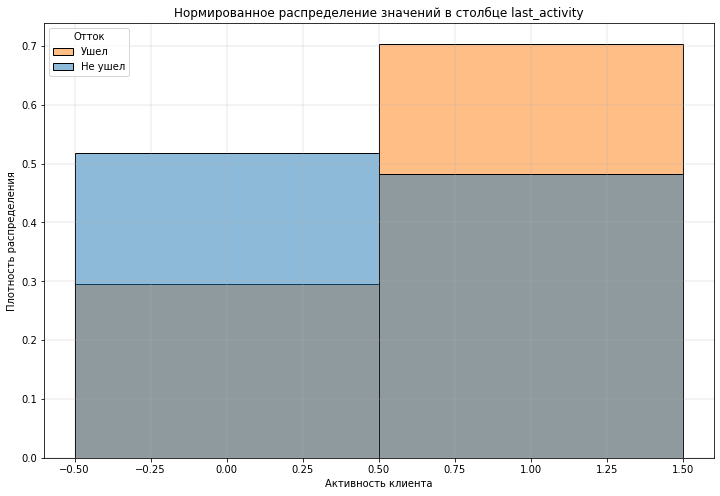

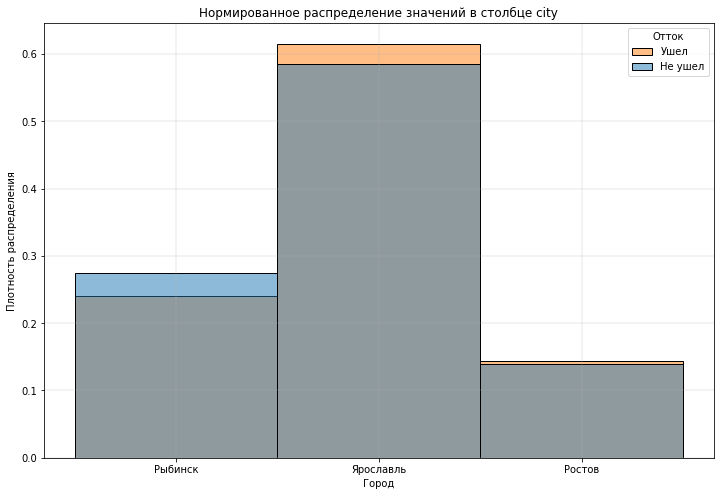

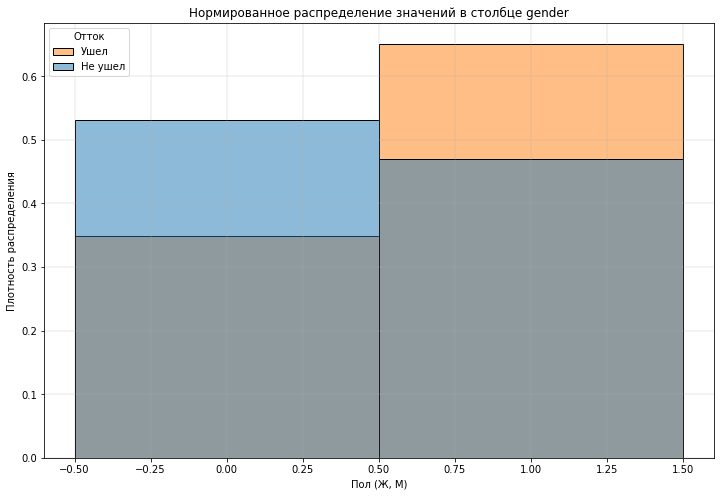

In [40]:
colum = ['equity', 'products', 'credit_card', 'last_activity', 'city', 'gender']
column_name = {
    'equity': 'Количество баллов собственности',
    'products': 'Количество продуктов',
    'credit_card': 'Кредитная карта',
    'last_activity': 'Активность клиента',
    'city': 'Город',
    'gender': 'Пол (Ж, М)',
    'score': 'Баллы кредитного скоринга',
    'age': 'Возраст',
    'balance': 'Баланс',
    'est_salary': 'Оценочный доход клиента'
}
for col in colum:
    df_histograms(df, col, True)

<span style="color:purple">**Комментарий:**</span> С увеличением баллов собственности наблюдается рост оттока клиентов, особенно заметный при переходе с 3 до 5 баллов, после чего на 6-ом уровне происходит резкое снижение. Наиболее подверженными оттоку являются пользователи, имеющие два продукта; клиенты с тремя и четырьмя продуктами имеют схожий риск ухода. Среди клиентов, склонных к оттоку, преобладают пользователи кредитных карт. Явно видно, что активные клиенты покидают банк чаще. В Ярославле зафиксировано наибольшее количество клиентов, подверженных оттоку среди представленных городов. Количество ушедших клиентов среди мужчин превышает, чем среди женщин.

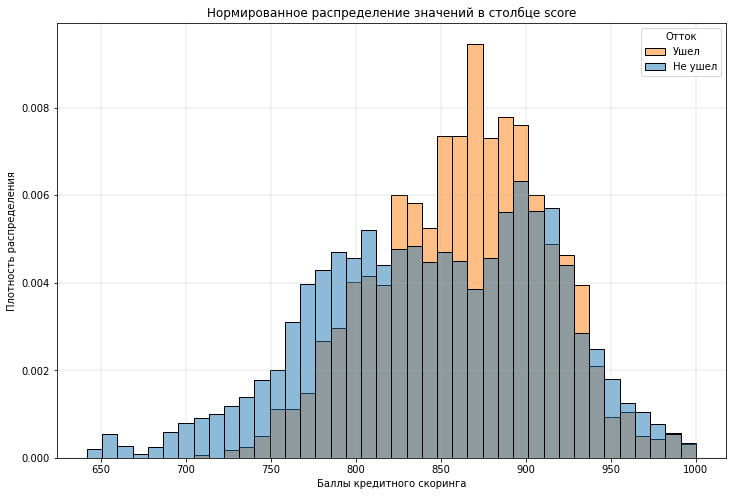

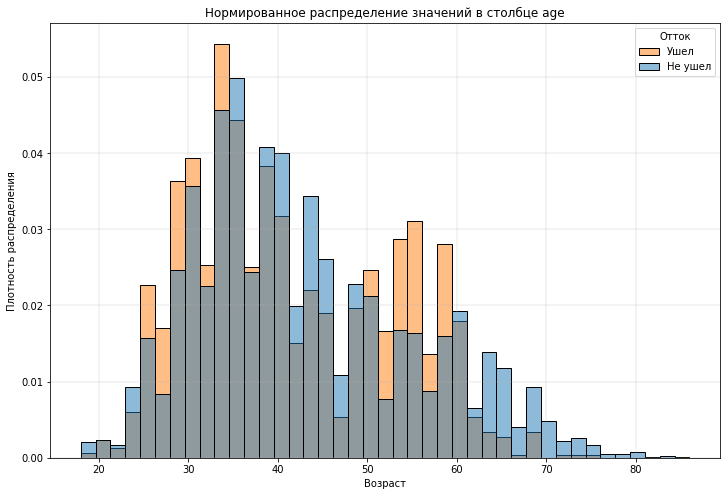

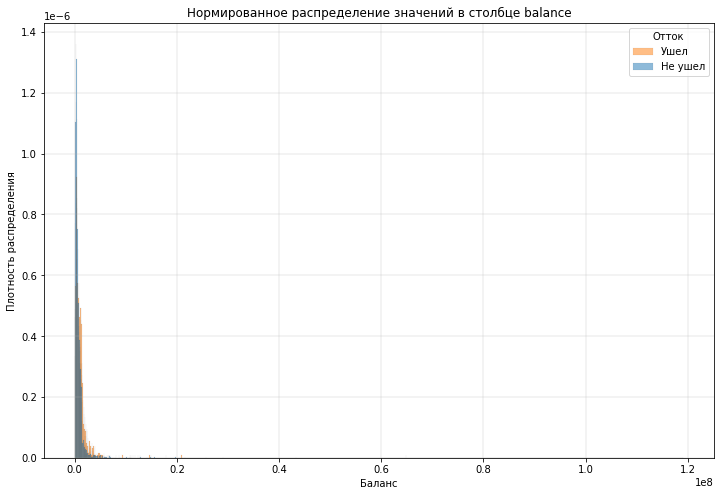

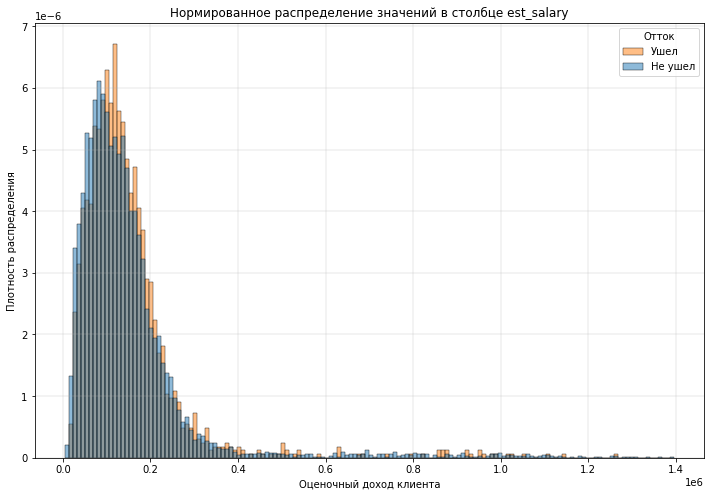

In [41]:
colum_numer = ['score',  'age', 'balance', 'est_salary']
for col in colum_numer:
    df_histograms(df, col, False)

<span style="color:purple">**Комментарий:**</span> Большинство клиентов, подверженных оттоку, обладают хорошим кредитным рейтингом. Выделяются два возрастных интервала, в которых доля отточных клиентов превышает количество неотточных: первый интервал — от 25 до 35 лет, второй — от 50 до 60 лет. При кредитном рейтинге от 830 баллов наблюдается рост оттока клиентов. По графикам баланс и оценочный доход сильный размах, можно поробовать построить график, убрав выбросы.

In [42]:
#выбираем размах в 0,99 квантилей
df[['balance', 'est_salary']].quantile([0.99])

,balance,est_salary
0.99,4.828333e+06,888881.4634


Text(0.5, 1.0, 'Распределение по балансу на счете')

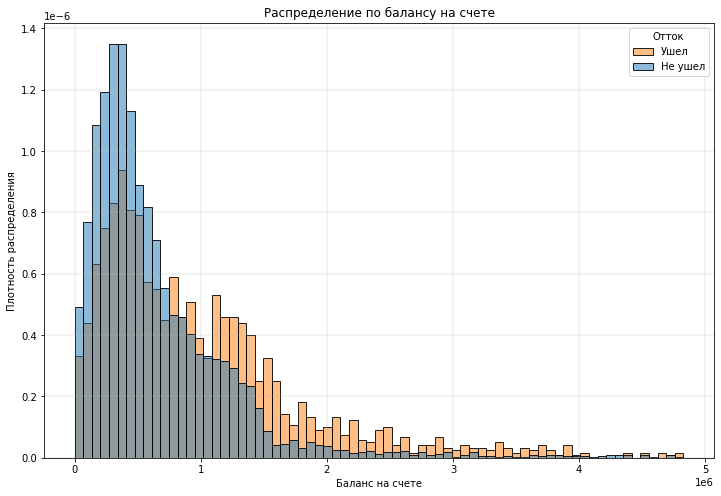

In [43]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df[df['balance'] < 4828333], x='balance', hue='churn', stat='density', common_norm=False)
plt.xlabel('Баланс на счете')
plt.ylabel('Плотность распределения')
plt.legend(title='Отток', labels=['Ушел','Не ушел'])
plt.grid(linewidth=0.3)
plt.title('Распределение по балансу на счете')

<span style="color:purple">**Комментарий:**</span>  Отток клиентов увеличиваются при балансе от 500 тыс.

Text(0.5, 1.0, 'Распределение по оценочному доходу')

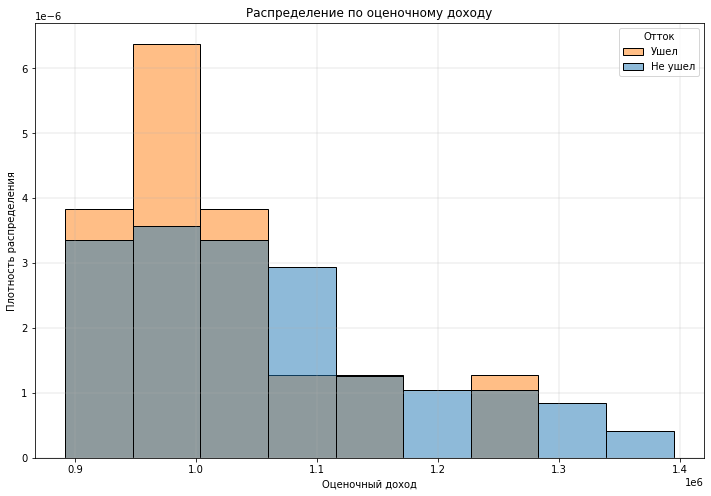

In [44]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df[df['est_salary'] > 888881 ], x='est_salary', hue='churn', stat='density', common_norm=False)
plt.xlabel('Оценочный доход')
plt.ylabel('Плотность распределения')
plt.legend(title='Отток', labels=['Ушел','Не ушел'])
plt.grid(linewidth=0.3)
plt.title('Распределение по оценочному доходу')

<span style="color:purple">**Комментарий:**</span>  Отток клиентов увеличиваются при оценочном доходе от 100 тыс.

<a id="activity"></a>
<span style="color:purple">**Вывод:**</span> 
всего ушло из банка 18 % клиентов (1807). На отток клиентов влияет следующие параметры:
- баллы кредитного скоринга (`score`),
- пол (`gender`),
- количество баллов собственности (`equity`),
- количество продуктов, которыми пользуется клиент (`products`),
- активность клиента (`last_activity`),
- наличие кредитной карты 

По оттоку, клиентов можно разделить на: от 25 до 35 лет и от 50 до 60 лет.

Начиная с 800 баллов процент ушедших клиентов возрастает. Отток среди женщин меньше (12.9 %) по сравнению с мужчинами (23.8 %).

Чем больше баллов собственности, тем выше процент клиентов, которые ушли (от 3,5 до 53.8 %). Начиная с 5 баллов отток уже составляет 30 %.

Чем больше количества продуктов, которыми пользуется клиент, тем больше процент отточности.

Активность клиента влияет на его отточность из банка. Самые активные уходят чаще.

<a id="hypothesis"></a>
## 4. Проверка статистических гипотез

При проверки гипотез мы будем использовать t-тест. Т.к. мы имеем нормальное распределение данных, клиенты в двух выборках не повторяются, однородность дисперсий и достаточно большой размер выборки.

Проверим несколько статистических гипотез.
1. Влияние различий доходов между клиентами, которые ушли и остались.
Сформулируем нулевую и альтернативную гипотезы:

- H₀: средние доходы оставшихся и ушедших клиентов равны
- H₁: средние доходы оставшихся и ушедших клиентов не равны
2. Влияние кредитного скоринга клиентов на отток. Сформулируем нулевую и альтернативную гипотезы:
- H₀: средние баллы кредитного скоринга оставшихся и ушедших клиентов равны
- H₁:  средние баллы кредитного скоринга оставшихся и ушедших клиентов не равны
3. Проверить влияние количества продуктов, используемых клиентами, на уход их из банка. Сформулируем нулевую и альтернативную гипотезы:
- H₀: среднее количество продуктов оставшихся и ушедших клиентов равны
- H₁: среднее количество продуктов оставшихся и ушедших клиентов не равны

In [45]:
#напишем функцию
def df_ttest(df, column, alpha):
    results = st.ttest_ind(
        df[df['churn'] == 0][column],
        df[df['churn'] == 1][column],
        equal_var=False
    )

    # Вывод результата
    if results.pvalue < alpha:
        print(f"p-value: {results.pvalue} - Отвергаем нулевую гипотезу")
    else:
        print(f"p-value: {results.pvalue} - Не получилось отвергнуть нулевую гипотезу")

In [46]:
df_ttest(df, 'est_salary', 0.05)

p-value: 0.9999373501186318 - Не получилось отвергнуть нулевую гипотезу


In [47]:
df_ttest(df, 'score', 0.05)

p-value: 1.9708223668916956e-37 - Отвергаем нулевую гипотезу


In [48]:
df_ttest(df, 'products', 0.05)

p-value: 2.9849291009114945e-140 - Отвергаем нулевую гипотезу


<span style="color:purple">**Вывод:**</span> 
1. Влияние различий доходов между клиентами, которые ушли и остались. Нулевую гипотезу не удалось отвергнуть. Средние доходы оставшихся и ушедших клиентов равны.
2. Влияние кредитного скоринга клиентов на отток. Нулевую гипотезу отвергнули, средние баллы кредитного скоринга оставшихся и ушедших клиентов не равны.
3. Проверить влияние количества продуктов, используемых клиентами, на уход их из банка. Нулевую гипотезу отвергнули, среднее количество продуктов, которыми пользуется клиент, оставшихся и ушедших клиентов не равны

<a id="segmentation"></a>
## 5. Сегментация по основным показателям

<a id="segment"></a>
**5.1. Формирование сегментов**

Исходя из исследовательского анализа данных, можем выделить основные признаки отточности, и на основании их сформулируем сегменты.
Признаки отточности:
- пол,
- возраст,
- количество баллов собственности,
- баллы кредитного скоринга,
- активность клиента,
- количество используемых продуктов,
- доход

**Сегмент клиентов №1**
- пол: мужской,
- возраст: от 25 до 60 лет,
- баллы кредитного скоринга: более 800,
- количество используемых продуктов: более или равно 2

In [49]:
df_1 = df.query('gender == 1 & products >= 2 & age >= 25 & age <= 60 & score >= 800')

In [50]:
df_1_count = df_1['churn'].value_counts().reset_index()
df_1['churn'] = df_1['churn'].replace({0: 'Остались', 1: 'Ушли'})
df_1_count.columns = ['churn', 'count']
df_1_count

,churn,count
0,0,1397
1,1,856


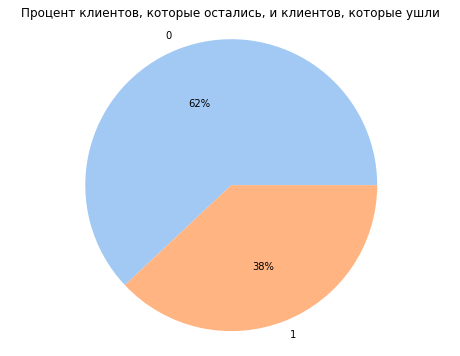

In [51]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(8, 6))
plt.pie(df_1_count['count'], labels=df_1_count['churn'], colors=colors, autopct='%.0f%%')
plt.title('Процент клиентов, которые остались, и клиентов, которые ушли')
plt.axis('equal')  # Чтобы круговая диаграмма была кругом
plt.show()

**Сегмент клиентов №2**
- пол: мужской,
- баллы кредитного скоринга: более 800,
- активность клиента: активный,
- количество используемых продуктов: более или равно 2
- доход от 100 тыс

In [52]:
df_2 = df.query('gender == 1 & products >= 2 & last_activity == 1 & score >= 800 & est_salary >=100000')

In [53]:
df_2_count = df_2['churn'].value_counts().reset_index()
df_2['churn'] = df_2['churn'].replace({0: 'Остались', 1: 'Ушли'})

In [54]:
df_2_count.columns = ['churn', 'count']
df_2_count

,churn,count
0,1,420
1,0,348


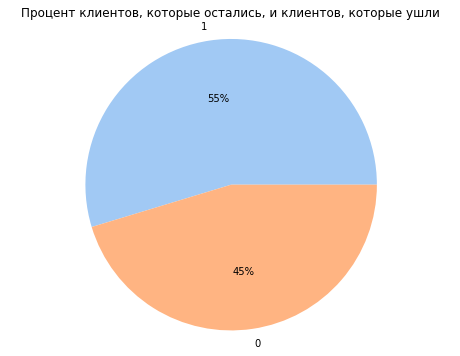

In [55]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(8, 6))
plt.pie(df_2_count['count'], labels=df_2_count['churn'], colors=colors, autopct='%.0f%%')
plt.title('Процент клиентов, которые остались, и клиентов, которые ушли')
plt.axis('equal')  # Чтобы круговая диаграмма была кругом
plt.show()

**Сегмент клиентов №3**
- количество баллов собственности: больше 3,
- баллы кредитного скоринга: более 800,
- активность клиента: активный,
- кредитная карта: отсутствует

In [56]:
df_3 = df.query('equity > 3 & last_activity == 1 & score >= 800 & credit_card == 0')

In [57]:
df_3_count = df_3['churn'].value_counts().reset_index()
df_3['churn'] = df_3['churn'].replace({0: 'Остались', 1: 'Ушли'})

In [58]:
df_3_count.columns = ['churn', 'count']
df_3_count

,churn,count
0,1,436
1,0,346


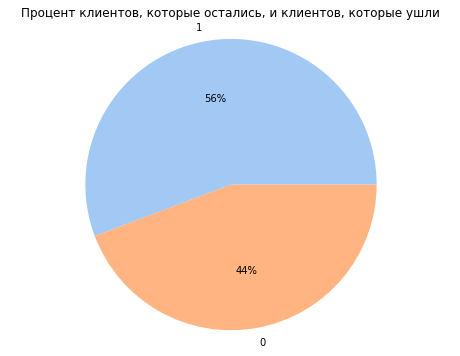

In [59]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(8, 6))
plt.pie(df_3_count['count'], labels=df_3_count['churn'], colors=colors, autopct='%.0f%%')
plt.title('Процент клиентов, которые остались, и клиентов, которые ушли')
plt.axis('equal')  # Чтобы круговая диаграмма была кругом
plt.show()

<a id="recommendations"></a>
## 6. Выводы и рекомендации по сегментам

<span style="color:purple">**Выводы**</span> 
1. В файле `bank_scrooge.csv` 10000 клиентов и 12 параметров. Выполнили предобработку данных:
- переименовали столбцы 'user_id' и 'est_salary'.
- удалили дубликаты из столбца `user_id` (в количестве 73).
- в `products` (продукты которыми пользуется клиент) удалили страку со значением 0.
- в `est_salary` (оценочный доход клиента) удалили строки клиентов с возрастом более 25 лет и с доходом менее МРОТ равного 19242 рублей (количество строк 101).
- удалили пропуски в столбце `age`.
- данные приведены к нужному типу.
- выполнили кодирование данных столбца `gender` и `city`.
В результате предобработки было удалено 1.28 % от всех данных.
2. В результате исследовательского анализа установили параметры, которые влияют на отток клиентов из банка, к ним относятся:
- пол. Отток среди женщин в два раза меньше, чем у мужчин (12.9 % против 23.8 %).
- возраст. Наиболее отточные клиенты в возрасте от 25 до 60 лет.
- количество баллов собственности. Чем больше баллов собственности, тем выше процент клиентов, которые ушли (от 3,5 до 53.8 %). Начиная с 5 баллов отток уже составляет 30 %.
- баллы кредитного скоринга. Начиная с 800 баллов кредитного скоринга, клиент уходит чаще.
- активность клиента. Более активные клиенты уходят чаще. При увеличении количества продуктов, которыми пользуется клиент, отточность выше.
- количество используемых продуктов. При увеличении количества продуктов, которыми пользуется клиент, отточность выше.
- наличие кредитной карты.
3. Проверили статистические гипотезы о:
- влиянии различий доходов между клиентами, которые ушли и остались. Получили, что средние доходы оставшихся и ушедших клиентов равны.
- влиянии кредитного скоринга клиентов на отток. Получили, что средние баллы кредитного скоринга оставшихся и ушедших клиентов не равны.
- влиянии количества продуктов, используемых клиентами, на уход их из банка. Получили, что среднее количество продуктов, которыми пользуется клиент, оставшихся и ушедших клиентов не равны.
4. Выполнили сегментацию по основным показателям. Выявили сегменты наиболее отточных клиентов.

<span style="color:purple">**Рекомендации**</span> 

Для уменьшения оттока клиентов можно предложить следующие рекомендации:
1. Целевая реклама, специальные предложения. Учитывать пол, т.к. отток среди мужчин выше.
2. Программы лояльности. Например, скидки и кэшбеки для клиентов с высоким количеством баллов собственности и кредитным рейтингом (выше 800).
3. Увеличение клиентской активности пользования приложением банка, например, внедрить в приложение игру.
4. Для клиентов от 25 до 60 лет предлагать инвестиционные продукты, программы накопления, цифровые услуги (планирование бюджета), кредитные программы.
5. Обратная связь и улучшение обслуживания. Мониторинг обратной связи клиентов.